<h1>Régression Logistique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Log-experiment-to-Neptune.ai" data-toc-modified-id="Log-experiment-to-Neptune.ai-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Log experiment to Neptune.ai</a></span></li><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#SPLITTING" data-toc-modified-id="SPLITTING-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SPLITTING</a></span></li><li><span><a href="#Métique-métier-et-scorer" data-toc-modified-id="Métique-métier-et-scorer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Métique métier et scorer</a></span><ul class="toc-item"><li><span><a href="#Scores-de-modèles-prédisant-toujours-la-même-classe" data-toc-modified-id="Scores-de-modèles-prédisant-toujours-la-même-classe-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scores de modèles prédisant toujours la même classe</a></span><ul class="toc-item"><li><span><a href="#Classe-majoritaire" data-toc-modified-id="Classe-majoritaire-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Classe majoritaire</a></span></li><li><span><a href="#Classe-minoritaire" data-toc-modified-id="Classe-minoritaire-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Classe minoritaire</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Evaluation-du-modéle" data-toc-modified-id="Evaluation-du-modéle-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Evaluation du modéle</a></span></li><li><span><a href="#Etude-des-differentes-options-pour-rétablir-l'équilbre-entre-les-classes" data-toc-modified-id="Etude-des-differentes-options-pour-rétablir-l'équilbre-entre-les-classes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Etude des differentes options pour rétablir l'équilbre entre les classes</a></span><ul class="toc-item"><li><span><a href="#Pipeline-with-sampling--step" data-toc-modified-id="Pipeline-with-sampling--step-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Pipeline with sampling  step</a></span><ul class="toc-item"><li><span><a href="#Under-Sampling" data-toc-modified-id="Under-Sampling-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Under Sampling</a></span></li><li><span><a href="#Over-Sampling" data-toc-modified-id="Over-Sampling-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Over Sampling</a></span></li><li><span><a href="#Class-Weight-'balanced'" data-toc-modified-id="Class-Weight-'balanced'-6.2.1.3"><span class="toc-item-num">6.2.1.3&nbsp;&nbsp;</span>Class Weight 'balanced'</a></span></li></ul></li><li><span><a href="#Combinaison-des-trois-solutions-précédentes" data-toc-modified-id="Combinaison-des-trois-solutions-précédentes-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Combinaison des trois solutions précédentes</a></span></li></ul></li><li><span><a href="#Recherche-de-la-combinaison-optimale" data-toc-modified-id="Recherche-de-la-combinaison-optimale-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Recherche de la combinaison optimale</a></span></li><li><span><a href="#Meilleure-solution" data-toc-modified-id="Meilleure-solution-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Meilleure solution</a></span></li></ul></li><li><span><a href="#Récapitulatif-des-scores" data-toc-modified-id="Récapitulatif-des-scores-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Récapitulatif des scores</a></span></li><li><span><a href="#Sauvegarde-du-modèle-pour-dasboard" data-toc-modified-id="Sauvegarde-du-modèle-pour-dasboard-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sauvegarde du modèle pour dasboard</a></span></li></ul></div>

# Imports




In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
pd.set_option('display.max_row', 244)
pd.set_option('display.max_column', 243)
pd.set_option('display.max_colwidth', 50)

# graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


# misc libaries
import missingno as msno
bleu = (70 / 255, 130 / 255, 180 / 255)
# import dataprep.eda as eda
#import qgrid

# File system manangement
import os
import joblib 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 1
%aimport Functions
from Functions import plot_confusion_matrix, cv_score,evaluate_estimator, proba_distributions, feature_importance_plot

Loading functions ...


.... done.


In [3]:
# CONSTANTS

ITERATIONS = 5

JOBS = 4

EDA = 'EDA 1-7 all features_aggregated'


LOG = True

RESUME = True
ID_RUN = 'PROJ-8'

# Log experiment to Neptune.ai

In [4]:
import neptune.new as neptune
import neptune.new.integrations.optuna as optuna_utils
from neptune.new.types import File

if LOG:
    NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkOTQ1YmNhNS1hZDYyLTRlYzQtYWU0Zi0xMjY0Yjg1MzBiMzEifQ=="
    # log to Neptune
    if RESUME:
        run = neptune.init(api_token=NEPTUNE_API_TOKEN,
                           project='m.leroy975/Projet07',
                           run=ID_RUN) # your credentials
    else:
        run = neptune.init(api_token=NEPTUNE_API_TOKEN,
                           project='m.leroy975/Projet07') # your credentials
    run['sys/tags'].add(EDA)
    run['sys/tags'].add('balanced')
    
    neptune_callback = optuna_utils.NeptuneCallback(run,
                                                    plots_update_freq=10,
                                                    log_plot_param_importances=True)   

Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/m.leroy975/Projet07/e/PROJ-8
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


# Chargement des données




In [5]:
# local run
path='FEATURES/'
features = joblib.load ( path+EDA+'.feat')

# Kaggle run
# path='../input/projet-07/' 
# features = joblib.load ( path+EDA+'.feat')

if LOG:
    # Name and hash of experiment features
    run['Data/Version/Features'].log(EDA)
    run['Data/Version/Features hash'].log(pd.util.hash_pandas_object(features))

Vérification du chargement

<AxesSubplot:>

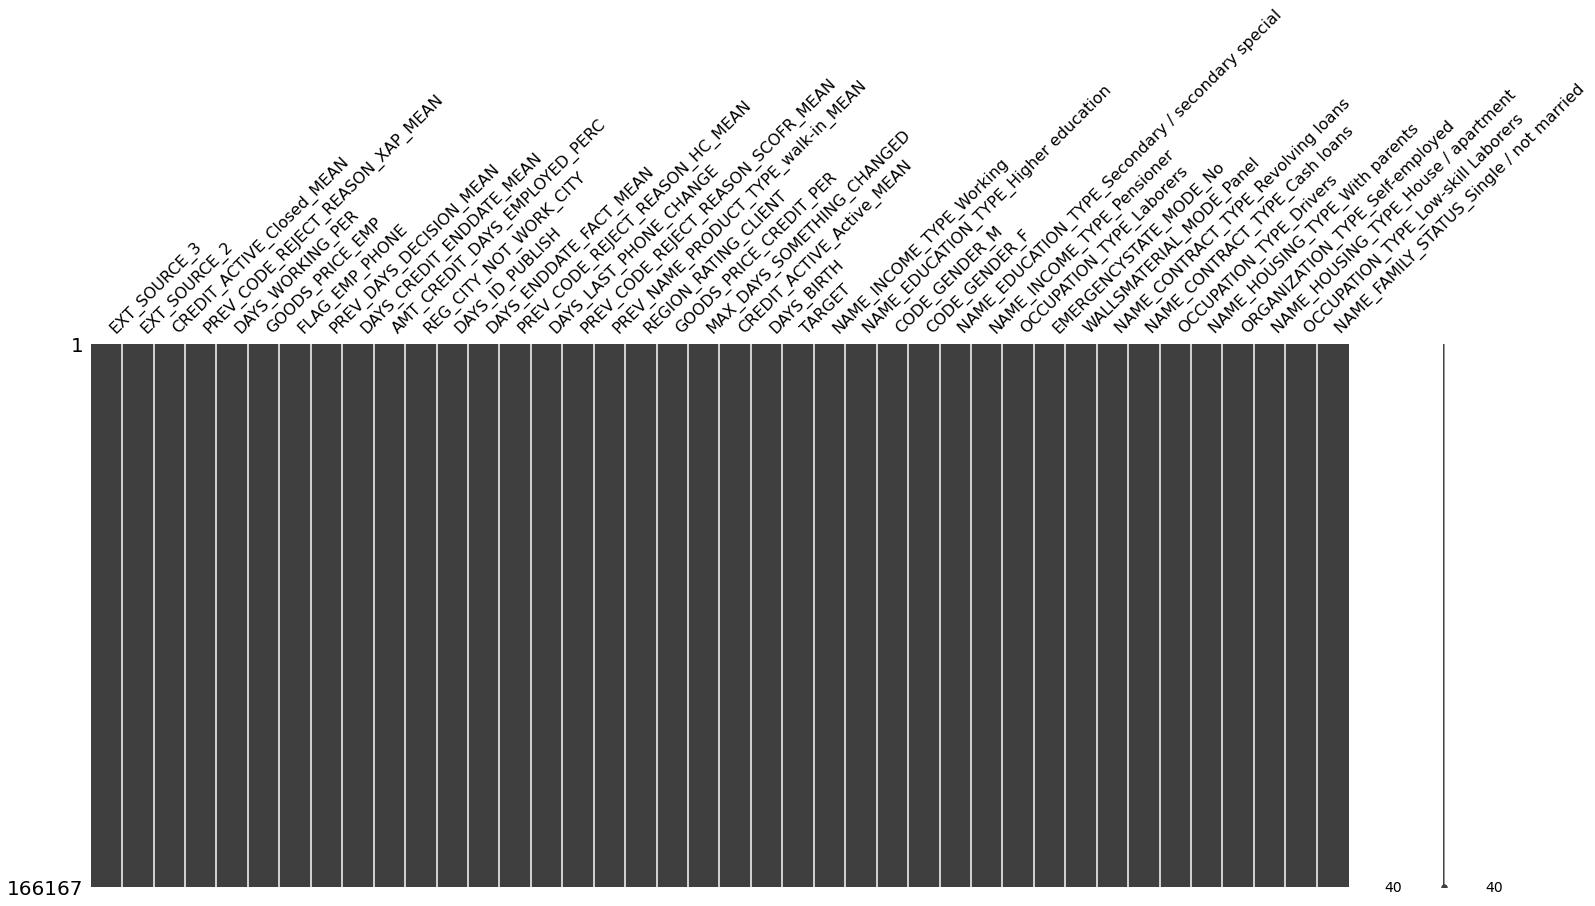

In [6]:
msno.matrix(features)

In [7]:
# Features overwiew
from collections import Counter

display(features)
print('Features shape {} x {}'.format(features.shape[0],features.shape[1]))
# TARGET ration on whole dataset
print('TARGET ratio {:.8%}'.format(features.TARGET.value_counts()[1]/features.TARGET.value_counts()[0]) )
print(Counter(features.TARGET))

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.262949,0.750000,1.00,0.067329,0.001815,1,-606.000000,-349.000000,-0.001567,0,-2120,-697.500000,0.00,-1134.0,0.0,0.00,2,1.158397,-637.0,0.250000,-9461,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1
100004,0.729567,0.555912,1.000000,1.00,0.011814,0.001667,1,-815.000000,-488.500000,-0.001667,0,-2531,-532.500000,0.00,-815.0,0.0,0.00,2,1.000000,-225.0,0.000000,-19046,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1
100008,0.621226,0.354225,0.666667,1.00,0.093737,0.003494,1,-1192.000000,-391.333333,-0.003238,0,-477,-909.000000,0.00,-2536.0,0.0,0.00,2,1.079198,-477.0,0.333333,-16941,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
100009,0.492060,0.724000,0.777778,1.00,0.227174,0.002244,1,-719.285714,-794.937500,-0.002005,0,-619,-1108.500000,0.00,-1562.0,0.0,0.00,2,1.118800,-619.0,0.222222,-13778,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
100010,0.540654,0.714279,0.500000,1.00,0.023820,0.000293,1,-1070.000000,-119.500000,-0.000293,1,-2379,-1138.000000,0.00,-1070.0,0.0,0.00,3,1.000000,-449.0,0.500000,-18850,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456246,0.735221,0.313334,0.666667,1.00,0.543859,0.038827,1,-897.000000,-234.666667,-0.038827,1,-4531,-1331.000000,0.00,-1516.0,0.0,0.00,2,1.000000,-4531.0,0.333333,-16063,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0
456247,0.609276,0.501221,0.727273,0.80,0.033614,0.001612,1,-1387.800000,1449.818182,-0.001155,0,-3936,-1085.000000,0.20,-2315.0,0.0,0.00,2,1.396000,-399.0,0.272727,-11870,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
456253,0.218859,0.535722,0.500000,1.00,0.529266,0.013540,1,-2380.000000,280.500000,-0.011689,1,-5150,-794.000000,0.00,-1909.0,0.0,0.00,3,1.158400,-5150.0,0.500000,-14966,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0


Features shape 166167 x 40
TARGET ratio 8.55196112%
Counter({0: 153076, 1: 13091})


In [8]:
# Descriptive Statistics of features
features.describe()

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
count,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000,166167.000000
mean,0.510254,0.522642,0.653379,0.862457,0.167316,0.007263,0.999958,-960.521684,530.334778,-0.006516,0.269277,-2930.144674,-948.376072,0.061706,-1068.932953,0.005888,0.081658,2.055155,1.121982,-1432.258649,0.342891,-15032.894594,0.078782,0.634380,0.268224,0.363875,0.636101,0.687832,0.000048,0.217281,0.525772,0.217841,0.093159,0.906841,0.072523,0.052080,0.142922,0.883238,0.006933,0.136549
std,0.194889,0.186316,0.224893,0.197724,0.138021,0.011067,0.006490,568.583412,2591.803993,0.009935,0.443586,1485.687941,512.259742,0.133164,825.083618,0.043194,0.177446,0.499675,0.124831,1181.062229,0.223960,3555.439786,0.269399,0.481605,0.443036,0.481115,0.481122,0.463379,0.006938,0.412397,0.499337,0.412780,0.290656,0.290656,0.259353,0.222189,0.349995,0.321138,0.082974,0.343372
min,0.000527,0.000010,0.000000,0.000000,0.000042,0.000002,0.000000,-2922.000000,-28039.000000,-0.256178,0.000000,-7197.000000,-2884.000000,0.000000,-4173.000000,0.000000,0.000000,1.000000,0.150000,-6226.000000,0.000000,-25200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,0.411550,0.500000,0.750000,0.061777,0.001720,1.000000,-1297.000000,-711.000000,-0.007465,0.000000,-4239.000000,-1269.500000,0.000000,-1684.000000,0.000000,0.000000,2.000000,1.000000,-2094.000000,0.187500,-17721.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.537070,0.573477,0.666667,1.000000,0.130267,0.003899,1.000000,-845.333333,-197.000000,-0.003506,0.000000,-3076.000000,-916.000000,0.000000,-929.000000,0.000000,0.000000,2.000000,1.118800,-1094.000000,0.333333,-14834.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.667458,0.666053,0.800000,1.000000,0.234369,0.008310,1.000000,-512.464286,505.950000,-0.001541,1.000000,-1696.000000,-565.633333,0.000000,-376.000000,0.000000,0.083333,2.000000,1.198000,-495.000000,0.500000,-12168.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.885488,0.855000,1.000000,1.000000,0.728811,0.256178,1.000000,-2.000000

# SPLITTING

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features,
                               test_size=.2,
                               random_state=42,
                               shuffle=True,
                               stratify=features.TARGET)

train_true = train.pop('TARGET')
print('train',train.shape)
print('TARGET=1 ratio on train {:.8%}'.format(train_true.value_counts()[1]/train_true.value_counts()[0]) )
test_true = test.pop('TARGET')
print('test',test.shape)
print('TARGET=1 ratio on test {:.8%}'.format(test_true.value_counts()[1]/test_true.value_counts()[0]))

train (132933, 39)
TARGET=1 ratio on train 8.55218030%
test (33234, 39)
TARGET=1 ratio on test 8.55108440%


In [10]:
if LOG:
    run['Data/Version/Train shape'].log(str(train.shape))
    run['Data/Version/Train target ratio'].log(train_true.value_counts()[1]/train_true.value_counts()[0])
    run['Data/Version/Test shape'].log(str(test.shape))
    run['Data/Version/Test target ratio'].log(test_true.value_counts()[1]/test_true.value_counts()[0])

# Métique métier et scorer

In [11]:
from sklearn.metrics import  confusion_matrix, make_scorer, roc_auc_score

# Cost weight penalties
tn_cost = 2  ; fp_cost = -5
fn_cost = -6  ; tp_cost = 1

penalty = np.array([tn_cost,fp_cost,fn_cost,tp_cost])

In [12]:
# The confusion matrix is normalized on true classes
# and penalties are applied
# Cette normalisation permet au score d'être insensible au rééchantillonnage
def raw_cost(y,y_pred):
    cm = confusion_matrix(y,y_pred,normalize='true')
    print(cm*100)
    return  sum( cm.reshape(-1)*penalty)

In [13]:
# Worst score
true =  [0,0,1,1]
preds = [1,1,0,0] 
print('Worst cost score : ',raw_cost(true, preds))

# Best score
true =  [0,0,0,1,1,1,1,0,0,0,1,0,1]
preds = [0,0,0,1,1,1,1,0,0,0,1,0,1] 
print('Best cost score : ',raw_cost(true, preds))


[[  0. 100.]
 [100.   0.]]
Worst cost score :  -11.0
[[100.   0.]
 [  0. 100.]]
Best cost score :  3.0


In [14]:
# Normalized cost function
def cost(y,y_pred):
    cm = confusion_matrix(y,y_pred,normalize='true')
    return  (sum( cm.reshape(-1)*penalty)+11)/14

SCORER = {'AUC' : 'roc_auc', 'COST' : make_scorer(cost)}

Worst cost score :  0.0


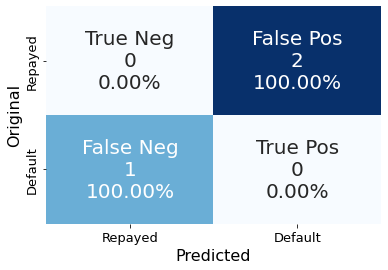

In [15]:
# Worst score
true =  [0,0,1]
preds = [1,1,0] 
print('Worst cost score : ',cost(true, preds))
# print('Worst roc auc score : ',roc_auc_score(true, preds))
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(true, preds, ax)

Best cost score :  1.0


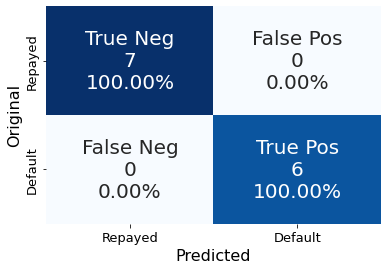

In [16]:
# Best score
true =  [0,0,0,1,1,1,1,0,0,0,1,0,1]
preds = [0,0,0,1,1,1,1,0,0,0,1,0,1] 
print('Best cost score : ',cost(true, preds))
# print('Best roc auc score : ',roc_auc_score(true, preds))
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(true, preds, ax)

## Scores de modèles prédisant toujours la même classe

###  Classe majoritaire

Score : 0.5


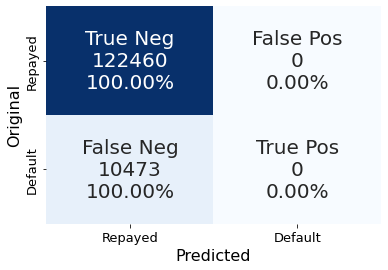

In [17]:
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(train_true, [0]*len(train_true), ax)
print('Score :',cost(train_true, [0]*len(train_true)))

In [18]:
roc_auc_score(train_true, [0]*len(train_true))

0.5

###  Classe minoritaire

Score : 0.5


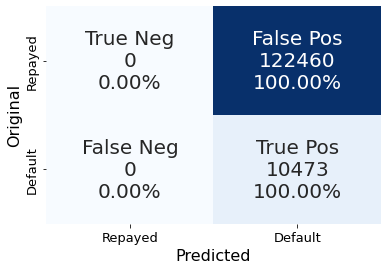

In [19]:
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(train_true, [1]*len(train_true), ax)
print('Score :',cost(train_true, [1]*len(train_true)))

In [20]:
roc_auc_score(train_true, [0]*len(train_true))

0.5

Tout modèle doit au moins avoir un score de plus de 50%

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

MODEL = LogisticRegression(random_state=42, n_jobs=-1)
if LOG:
    # Name and hash of experiment features
    run['Modele/Name'] = 'Logistic Regression'
    run['sys/description'] = 'Logistic Regression'
    

## Evaluation du modéle 

Pipeline : 

    * min max scaler [0;1]
    * modèle
    
Scores sur 5 cross validations    

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Class balance on fitting model step : Counter({0: 122460, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    122460
           1       0.52      0.01      0.02     10473

    accuracy                           0.92    132933
   macro avg       0.72      0.50      0.49    132933
weighted avg       0.89      0.92      0.88    132933

 Scores  on train : {'COST': 0.5038897524420378, 'AUC': 0.7427149653369988}
TEST
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     30616
           1       0.63      0.01      0.02      2618

    accuracy                           0.92     33234
   macro avg       0.77      0.50      0.49     33234
weighted avg       0.90      0.92      0.89     33234

 Scores  on test : {'COST': 0.5048953068174084}


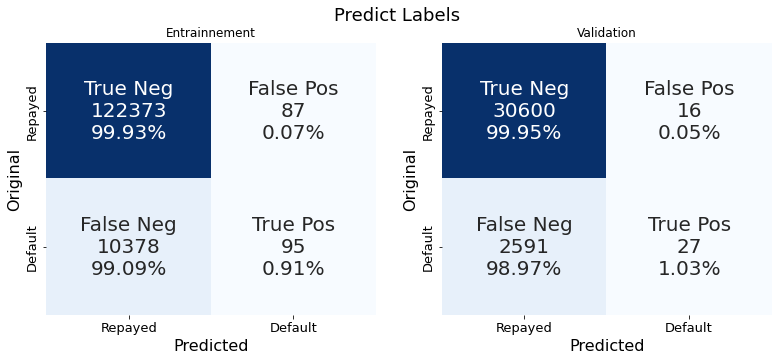

In [23]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import Pipeline 

from collections import Counter


pipe = Pipeline([ 
                 ('scaler' , MinMaxScaler(feature_range=(0, 1))),
                          
                 ('model', MODEL)
               ])

# fit pipeline on train
pipe.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(train_true))
if LOG:
    run['Modele/[Out of bag]/Classe efectives'] = str(Counter(train_true))

# print evaluation summary
evaluate_estimator(pipe,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Out of bag]/')
                  )

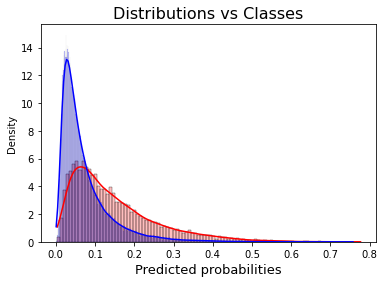

In [24]:
# Distribution of prediction probabilities versus classes
train_predicted_probas = pipe.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Out of bag]/Train')
                   )

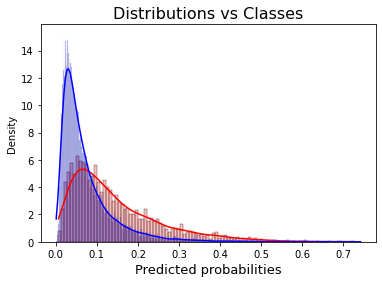

In [25]:
# Distribution of prediction probabilities versus classes
test_predicted_probas = pipe.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Out of bag]/Test')
                   )

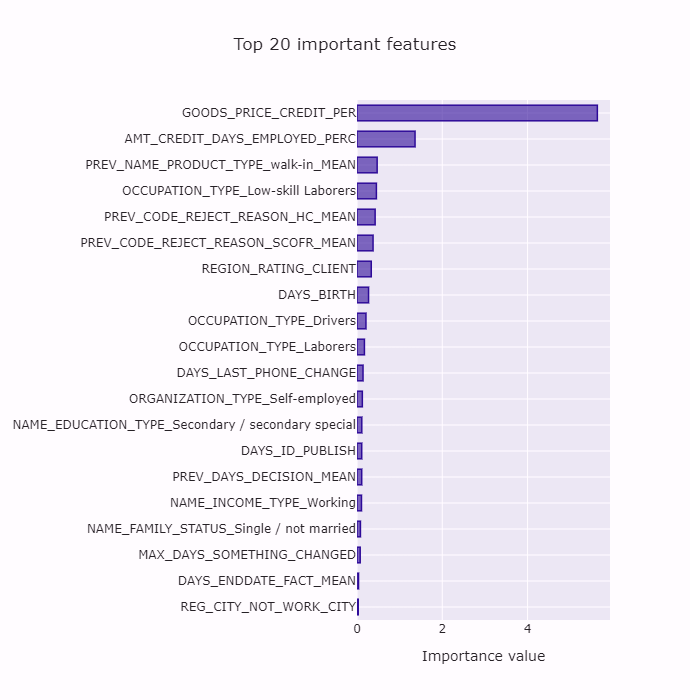

In [26]:
# Feature importance for model
feature_importance_plot(pipe[-1].coef_[0],train,
                        (LOG,run,'Modele/[Out of bag]/')
                       )

## Etude des differentes options pour rétablir l'équilbre entre les classes

### Pipeline with sampling  step

In [27]:
pipe_samplers = Pipeline([ 
                          ('over' , None),
                          ('under' , None),
                          ('scaler' , MinMaxScaler(feature_range=(0, 1))),
                          
                          ('model', MODEL)
                     ]
                    )

#### Under Sampling

Pipeline(steps=[('over', None), ('under', RandomUnderSampler(random_state=42)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

Class balance on fitting model step : Counter({0: 10473, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6803243286042586, 'AUC': 0.7422786707300529}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.81     30616
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6750998419416702}


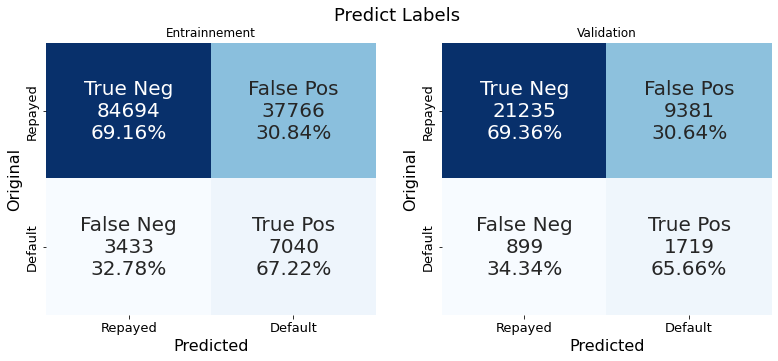

In [28]:
from sklearn.base import clone
from imblearn.under_sampling import RandomUnderSampler 

pipe_under = clone(pipe_samplers)

# set pipeline set 'sampler' to RandomUnderSampler
pipe_under.set_params(**{'under': RandomUnderSampler (random_state=42) })
display(pipe_under)

# fit pipeline on train
pipe_under.fit(train, train_true)


# Count effective classes
sampled_train_true = pipe_under[0:2].fit_resample(train,train_true)[1]
print('Class balance on fitting model step : %s' % Counter(sampled_train_true))
if LOG:
    run['Modele/[Under]/Classe efectives'] = str(Counter(sampled_train_true))


evaluate_estimator(pipe_under,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Under]/')
                  )

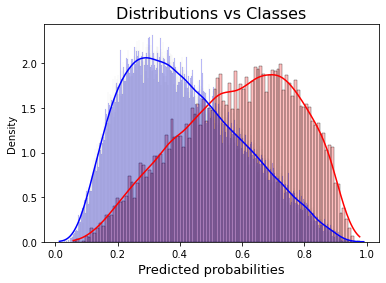

In [29]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_under.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Under]/Train')
                   )

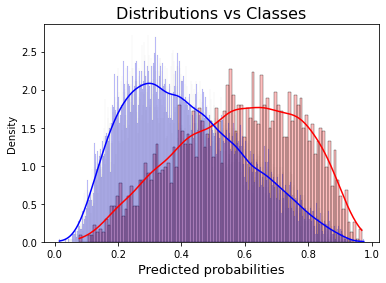

In [30]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_under.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Under]/Test')
                   )

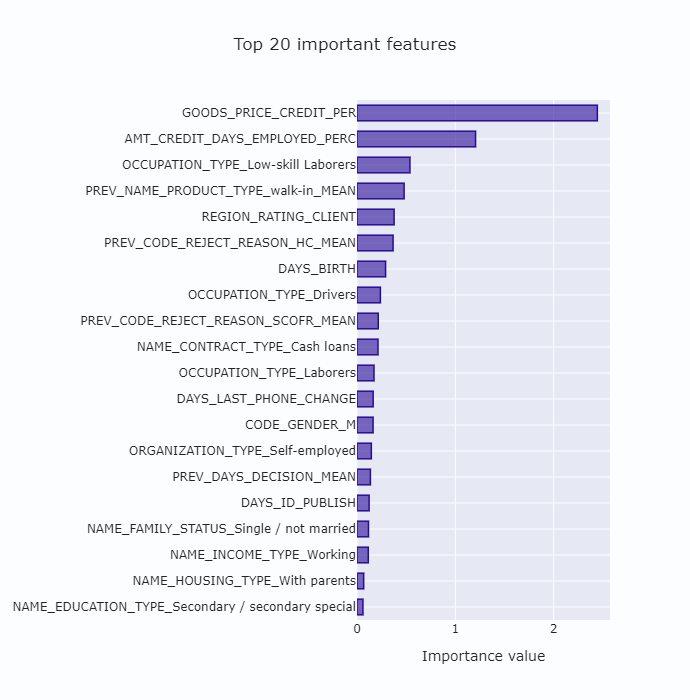

In [31]:
# Feautres importance for model
feature_importance_plot(pipe_under[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Under]/')
                       )

#### Over Sampling

Pipeline(steps=[('over', RandomOverSampler(random_state=42)), ('under', None),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

Class balance on fitting model step : Counter({0: 122460, 1: 122460})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6813923945074685, 'AUC': 0.7429833754996424}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30616
           1       0.16      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6764821037567698}


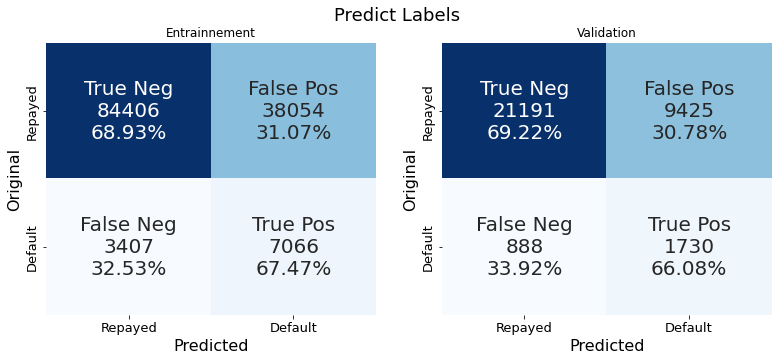

In [32]:
from imblearn.over_sampling import RandomOverSampler 

pipe_over = clone(pipe_samplers)

# set pipeline set 'sampler' to RandomOverSampler
pipe_over.set_params(**{'over': RandomOverSampler (random_state=42) })
display(pipe_over)

# fit pipeline on train
pipe_over.fit(train, train_true)

# Count effective classes
sampled_train_true = [0,1]*train_true.value_counts()[0] #pipe_over[0:2].fit_resample(train,train_true)[1]
print('Class balance on fitting model step : %s' % Counter(sampled_train_true))
if LOG:
    run['Modele/[Over]/Classe efectives'] = str(Counter(sampled_train_true))

# evaluate
evaluate_estimator(pipe_over,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Over]/')
                  )

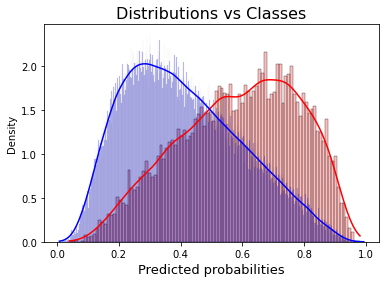

In [33]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_over.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Over]/Train')
                   )

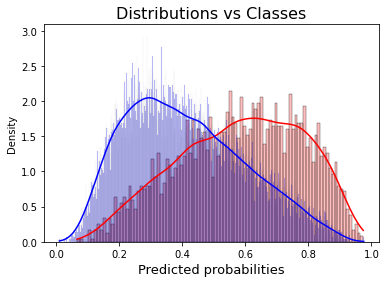

In [34]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_over.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Over]/Test')
                   )

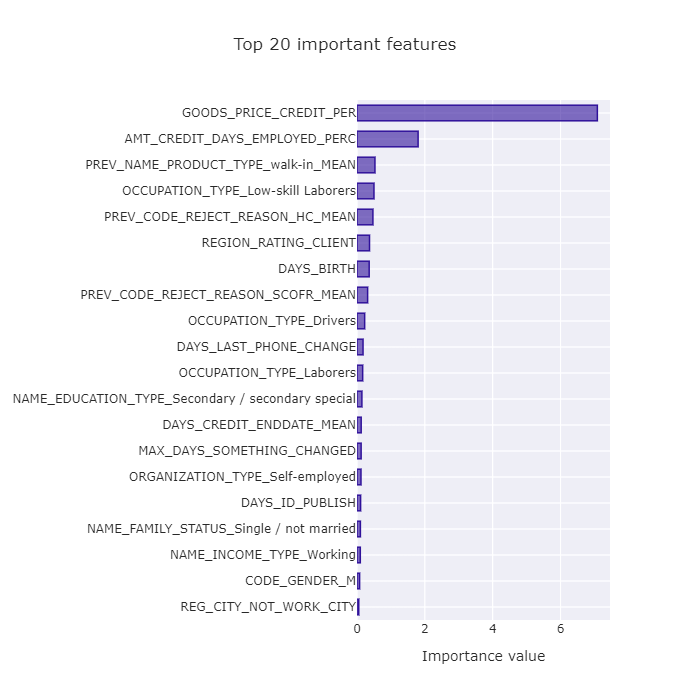

In [35]:
# Feautres importance for model
feature_importance_plot(pipe_over[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Over]/')
                       )

#### Class Weight 'balanced'

Pipeline(steps=[('over', None), ('under', None), ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=42))])

Class balance on fitting model step : Counter({0: 122460, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.68      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6817106225775577, 'AUC': 0.7429463619458196}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30616
           1       0.16      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6770650411624375}


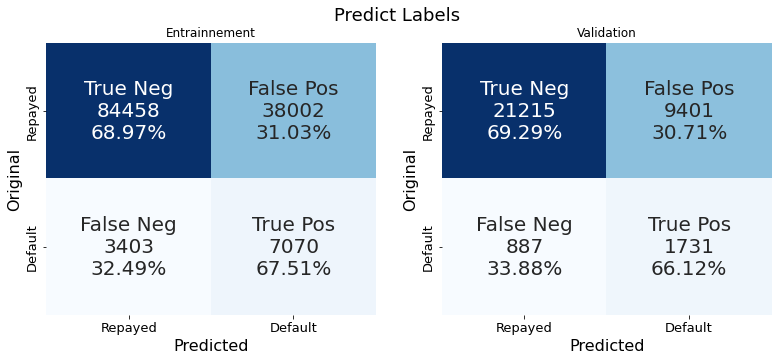

In [36]:

pipe_balance = clone(pipe_samplers)

# fit pipeline on train with sample_weight
pipe_balance.set_params(**{'model__class_weight': 'balanced'})
display(pipe_balance)

# fit pipeline on train
pipe_balance.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(train_true))
if LOG:
    run['Modele/[Balance]/Classe efectives'] = str(Counter(train_true))

# evaluate
evaluate_estimator(pipe_balance,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Balance]/')
                  )


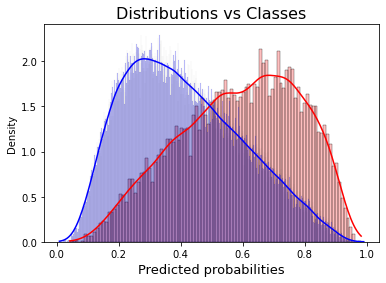

In [37]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_balance.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Balance]/Train')
                   )

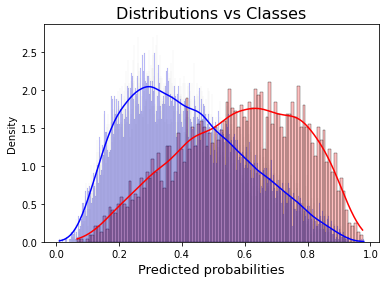

In [38]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_balance.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Balance]/Test')
                   )

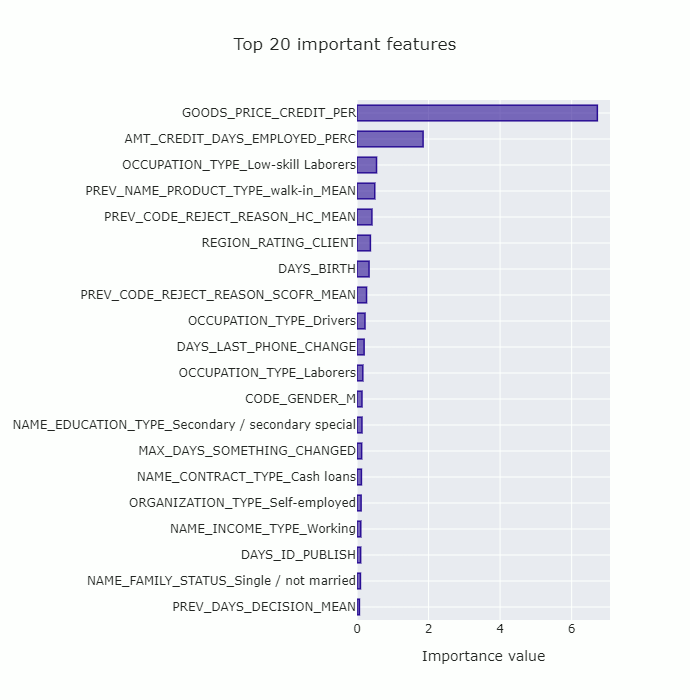

In [39]:
# Feautres importance for model
feature_importance_plot(pipe_balance[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Balance]/')
                       )

### Combinaison des trois solutions précédentes

Pour rééquilibrer les classes:

    * undersampler classe majoritaire en ne prenant que 75% des samples de cette classe
    
    * oversampler classe ninoritaire en duplicant 25% des samples de cette classe
    
    * pondérer les individus en fonction de leur appartenance à majority ou miority (option 'balanced' du modèle)





Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.10690225379715826)),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.14253633839621102)),
                ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=42))])

Class balance on fitting model step : Counter({0: 91843, 1: 13091})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.68      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6817301599786949, 'AUC': 0.7428927216884594}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30616
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6752332123908309}


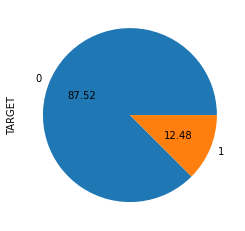

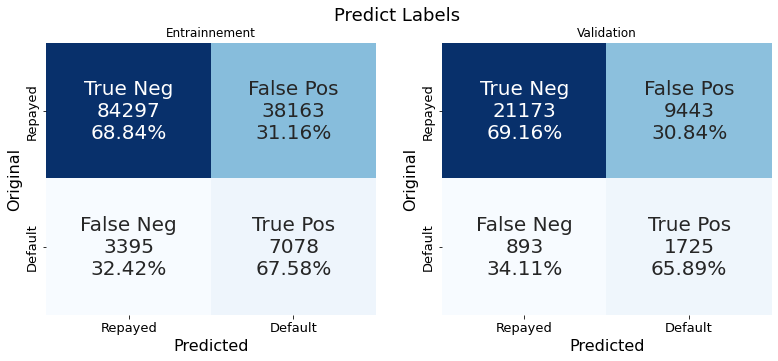

In [40]:
# Initial ratio between classes
ratio_initial = train_true.value_counts()[1]/train_true.value_counts()[0]

# Sampling factors
over = .25
under = .75
# Compute strategy for samplers
over_strategy = ratio_initial *(1 + over)
under_strategy = ratio_initial *(1 + over)/( under)

# set pipeline over and under 
pipe_samplers.set_params(**{'over': RandomOverSampler (random_state=42,sampling_strategy=over_strategy),
                        'under': RandomUnderSampler (random_state=42,sampling_strategy=under_strategy),
                        'model__class_weight': 'balanced'})
display(pipe_samplers)

# fit pipeline on train
pipe_samplers.fit(train, train_true)

# Count effective classes
sampled_train_true = pipe_samplers[0:2].fit_resample(train,train_true)[1]

print('Class balance on fitting model step : %s' % Counter(sampled_train_true))

sampled_train_true.value_counts().plot.pie(autopct='%.2f')
if LOG:
    run['Modele/[Samplers & Weight]/Classe efectives'] = str(Counter(sampled_train_true))


# evaluate
evaluate_estimator(pipe_samplers,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Samplers & Weight]/')
                  )

Le modèle généralise bien, les écarts sont minces entre entrainement et validation.

Grid search pour déterminer les meilleurs paramètres du pipeline

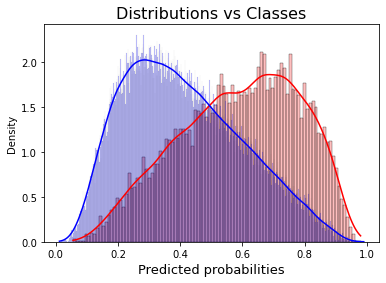

In [41]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_samplers.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Samplers & Weight]/Train')
                   )

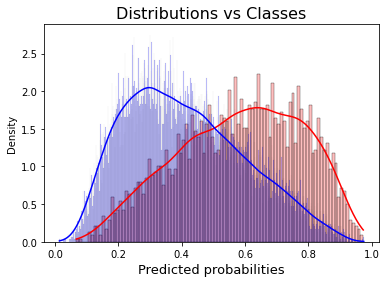

In [42]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_samplers.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Samplers & Weight]/Test')
                   )

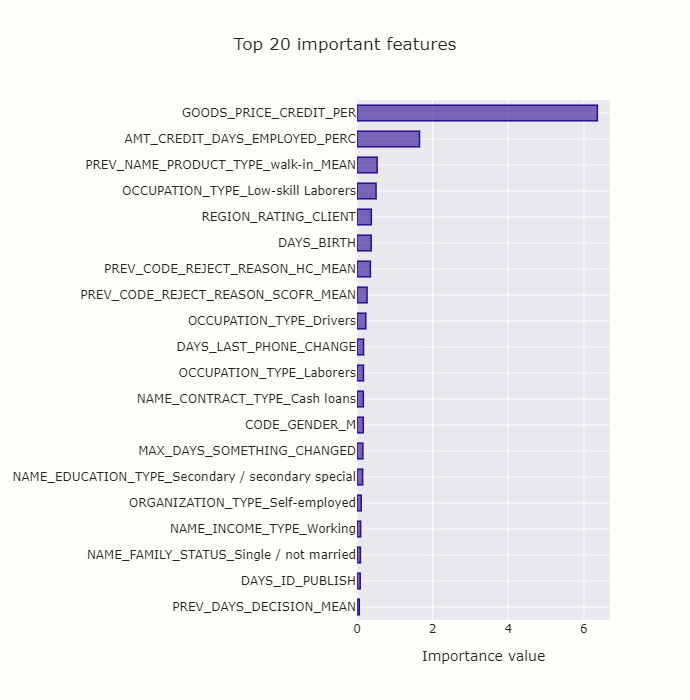

In [43]:
# Feautres importance for model
feature_importance_plot(pipe_samplers[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Samplers & Weight]/')
                       )

## Recherche de la combinaison optimale

In [44]:
from sklearn.preprocessing import StandardScaler  # MODIFIE
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from joblib import Memory
from shutil import rmtree
# Create a temporary folder to store the transformers of the pipeline
# location = 'cachedir0'
# memory = Memory(location=location, verbose=0)


# Reset pipeline parameters
pipe_optim = Pipeline([ #('variance' , VarianceThreshold(threshold=0.0)),
                            ('over' , RandomOverSampler (random_state=42)),
                            ('under' , RandomUnderSampler(random_state=42)),
                            ('scaler' , None),

                            ('model', LogisticRegression(random_state=42,max_iter=1000,n_jobs=-1))
                        ],
#                         memory=memory
                       )

In [45]:
pipe_optim.get_params()

{'memory': None,
 'steps': [('over', RandomOverSampler(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('scaler', None),
  ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42))],
 'verbose': False,
 'over': RandomOverSampler(random_state=42),
 'under': RandomUnderSampler(random_state=42),
 'scaler': None,
 'model': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
 'over__random_state': 42,
 'over__sampling_strategy': 'auto',
 'over__shrinkage': None,
 'under__random_state': 42,
 'under__replacement': False,
 'under__sampling_strategy': 'auto',
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': -1,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [46]:
### fonction to maximize
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.base import clone

ratio_initial = train_true.value_counts()[1]/train_true.value_counts()[0]
std = StandardScaler()
mmx = MinMaxScaler(feature_range=(0, 1))
qt = QuantileTransformer(n_quantiles=10000,
                        output_distribution='normal',
                        ignore_implicit_zeros=False,
                        subsample=100000,
                        random_state=42)
rob = RobustScaler(with_centering=True,
                        with_scaling=True,
                        quantile_range=(25.0, 75.0),
                        copy=True,
                        unit_variance=True)
pwt = PowerTransformer(method='yeo-johnson',
                     standardize=True,
                     copy=True)

def Opt_search(trial):
    # the function gets a set of variable parameters in "param"
    # we use theses params to set pipeline params
    
    # Initialize params
    params = {}
    pipe = clone(pipe_optim)
    
    # Variance space
#     params['variance__threshold'] = trial.suggest_float('variance', 0, .1)  # MODIFIE
    
    # ratios for samplers
    o_r = trial.suggest_float('ratio_over', 0, 1)
    u_r = trial.suggest_float('ratio_under', .5, 1)
    
    #over sampling
    params['over__sampling_strategy'] =  ratio_initial *(1 + o_r)
    
    # under sampling
    params['under__sampling_strategy'] = ratio_initial *(1 + o_r)/( u_r) 
    
    # sample weight
#     x = trial.suggest_float('weight',0.5,0.99)  # MODIFIE
#     params['model__class_weight'] = {0 : 1-x, 1 : x}
    params['model__class_weight'] = 'balanced'
        
    # Scaller space
    scaler_name = trial.suggest_categorical('scaller name', ['StandardScaler',
                                                             'MinMaxScaler',
                                                             'QuantileTransformer',
                                                             'RobustScaler',
                                                             'PowerTransformer'
                                                            ])
    if scaler_name == 'MinMaxScaler':
        params['scaler'] = mmx
                                             
    elif scaler_name == 'StandardScaler':
        params['scaler'] =  std   
        
    elif scaler_name == 'QuantileTransformer':
        params['scaler'] =  qt
        
    elif scaler_name == 'RobustScaler':
        params['scaler'] =  rob
        
    elif scaler_name == 'PowerTransformer':
        params['scaler'] =  pwt
        
    # Linear regression space       
    params['model__C'] = trial.suggest_float('model__C',1E-3,1E3)
    params['model__tol'] = trial.suggest_loguniform('model__tol',1E-6,1E-2)
    params['model__solver'] = trial.suggest_categorical('model__solver',['newton-cg','lbfgs','sag']) #removed since since too much convergence Warning did not converge

           
#     print(params)
    
    # we use theses params to set pipeline params
    pipe.set_params(**params)
    
    #     print(pipe.get_params(deep=False))
               
    # score
    score = cross_validate(pipe,
                           train,
                           train_true,
                           scoring=SCORER,
                           n_jobs=1,
                           cv=cv)
    
    print('> cv cost score mean: %.4f (\u00B1 %.4f) <> roc auc score mean: %.4f (\u00B1 %.4f) < ' % (
                                                                                        score['test_COST'].mean(),
                                                                                        score['test_COST'].std(),
                                                                                        score['test_AUC'].mean(),
                                                                                        score['test_AUC'].std()
                                                                                       )
         )
    
    if LOG:
        run['AUC'].log(score['test_AUC'].mean())
        run['COST'].log(score['test_COST'].mean())
        
    return score['test_COST'].mean()

In [47]:
# Verify pipeline before optimize
pipe_optim.get_params(deep=False)

{'memory': None,
 'steps': [('over', RandomOverSampler(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('scaler', None),
  ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42))],
 'verbose': False}

In [48]:
# Create study the first time or append existing
import os.path
from os import path
import optuna
from optuna.samplers import TPESampler


# Studiing n_iter times
n_iter = ITERATIONS

# Optimize
if LOG and RESUME:
    # Load Optuna Study from the Neptune Run
    study = optuna_utils.load_study_from_run(run)  
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS, callbacks=[neptune_callback])
elif LOG and not RESUME:
    name = 'LR '+EDA
    study = optuna.create_study(study_name=name,
                                    direction='maximize',

                                    sampler=TPESampler(n_startup_trials= 50)
                                   )
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS, callbacks=[neptune_callback])
    
else:
    # Local run
    save_path = 'Studies/'
    name =save_path+'NEWRUN_lr_'+EDA+'reg_COST1'
    file_name = name+'.study'

    if path.exists(file_name):
        # load study
        study = joblib.load(file_name)
        print('Loading {}'.format(file_name))

        # Load Optuna Study from the Neptune Run
    #     study = optuna_utils.load_study_from_run(run)

    else:
        # Otherwise create study
        print('Creating a new study named {}'.format(name))
        study = optuna.create_study(study_name=name,
                                    direction='maximize',

                                    sampler=TPESampler(n_startup_trials= 10)
                                   )
        
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS)

# # save the sutdy 
# joblib.dump(study, file_name)

# print best results
print('Best custom_score = {} for :\n'.format(study.best_value))

for key, value in study.best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-07-28 13:10:25,036] Trial 293 finished with value: 0.6819596607004241 and parameters: {'ratio_over': 0.4257699405494008, 'ratio_under': 0.738147210129797, 'scaller name': 'RobustScaler', 'model__C': 475.44910178560104, 'model__tol': 0.00013558112343254493, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6820 (± 0.0055) <> roc auc score mean: 0.7430 (± 0.0062) < 


[I 2021-07-28 13:16:15,157] Trial 290 finished with value: 0.681787859053683 and parameters: {'ratio_over': 0.43267709338829025, 'ratio_under': 0.7384870545777164, 'scaller name': 'RobustScaler', 'model__C': 477.3938259994669, 'model__tol': 2.973677474459366e-05, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6818 (± 0.0057) <> roc auc score mean: 0.7429 (± 0.0062) < 


[I 2021-07-28 13:16:15,513] Trial 291 finished with value: 0.6817140485877355 and parameters: {'ratio_over': 0.4280715760781975, 'ratio_under': 0.7397485793934351, 'scaller name': 'RobustScaler', 'model__C': 474.7876496111839, 'model__tol': 3.4781817276505775e-06, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6817 (± 0.0055) <> roc auc score mean: 0.7430 (± 0.0062) < 


[I 2021-07-28 13:16:16,447] Trial 292 finished with value: 0.681883370037446 and parameters: {'ratio_over': 0.43706936517688766, 'ratio_under': 0.7397005071594976, 'scaller name': 'RobustScaler', 'model__C': 476.4472800928762, 'model__tol': 0.00013122711261195354, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6819 (± 0.0054) <> roc auc score mean: 0.7429 (± 0.0062) < 


[I 2021-07-28 13:17:41,980] Trial 294 finished with value: 0.6819282370720081 and parameters: {'ratio_over': 0.4408692818702012, 'ratio_under': 0.7255361882808605, 'scaller name': 'RobustScaler', 'model__C': 233.3964558749445, 'model__tol': 0.0001747229082665551, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6819 (± 0.0054) <> roc auc score mean: 0.7429 (± 0.0062) < 
Best custom_score = 0.6822700282610178 for :

    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


In [49]:
print('Best custom_score = {} for :\n'.format(study.best_value))

for key, value in study.best_params.items():
    print("    {}: {}".format(key, value))

Best custom_score = 0.6822700282610178 for :

    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


In [50]:
# Log Optuna Study metadata
if LOG:
#     optuna_utils.log_study_metadata(study, run)
    run['_So far executed trials'] = len(study.trials)

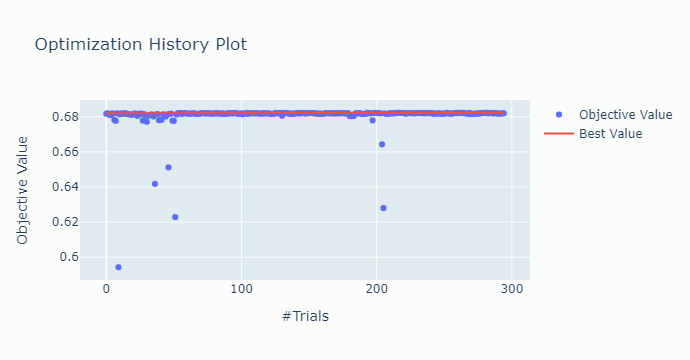

In [51]:
# history
optuna.visualization.plot_optimization_history(study)

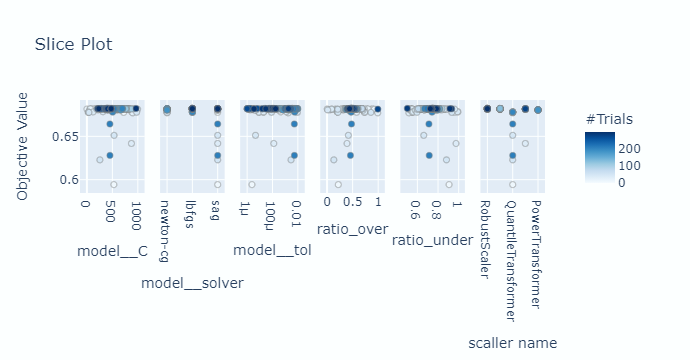

In [52]:
# Visualize individual hyperparameters as slice plot.
optuna.visualization.plot_slice(study)

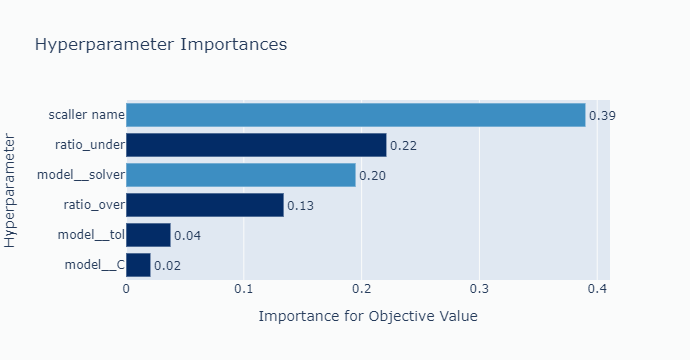

In [53]:
# Visualize parameter importances. 
optuna.visualization.plot_param_importances(study)

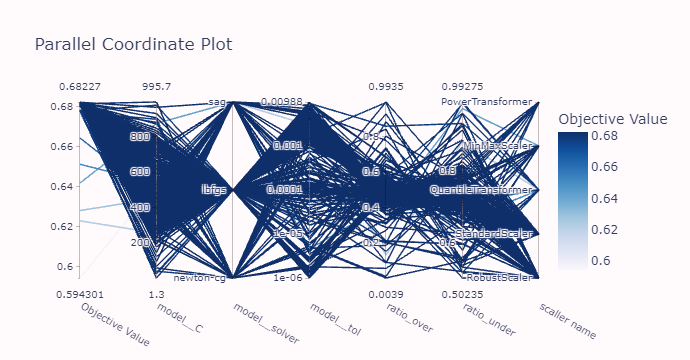

In [54]:
# Space search visualisation
optuna.visualization.plot_parallel_coordinate(study)

In [55]:
# Delete the temporary cache before exiting
# memory.clear(warn=False)
# rmtree(location)

## Meilleure solution

In [56]:
# Load best params from last search from file
# study=joblib.load(file_name)
best = study.best_params

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.6822700282610178
  Params: 
    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


Class balance on fitting model step : Counter({0: 91843, 1: 13091})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122460
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132933
   macro avg       0.56      0.68      0.53    132933
weighted avg       0.90      0.69      0.76    132933

 Scores  on train : {'COST': 0.6817472552954342, 'AUC': 0.7428749727814841}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30616
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33234
   macro avg       0.56      0.68      0.53     33234
weighted avg       0.90      0.69      0.76     33234

 Scores  on test : {'COST': 0.6763024591265111}


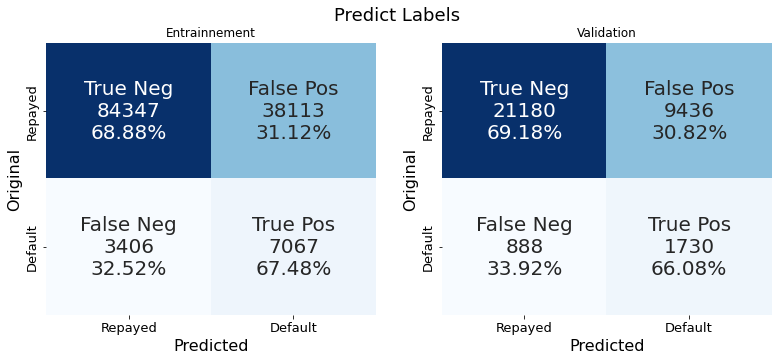

In [57]:
# print best results
# print('Best custom_score = {} for {}'.format(study.best_value,best))

# Initialize params
params = {}


# Variance space
# params['variance__threshold'] = best['variance']

# ratios for samplers
o_r = best['ratio_over']
u_r = best['ratio_under']

#over sampling
params['over__sampling_strategy'] =  ratio_initial *(1 + o_r)

# under sampling
params['under__sampling_strategy'] = ratio_initial *(1 + o_r)/( u_r)
    
# sample weight
# x = best['weight']  # MODIFIE
# params['model__class_weight'] = {0 : 1-x, 1 : x}
params['model__class_weight'] = 'balanced'

# Scaller space
scaler_name = best['scaller name']

if scaler_name == 'MinMaxScaler':
    params['scaler'] = mmx
elif scaler_name == 'StandardScaler':
    params['scaler'] =  std   
elif scaler_name == 'QuantileTransformer':
    params['scaler'] =  qt
elif scaler_name == 'RobustScaler':
    params['scaler'] =  rob
elif scaler_name == 'PowerTransformer':
    params['scaler'] =  pwt   
    
# Linear regression space       
params['model__C'] = best['model__C']
params['model__tol'] = best['model__tol']
params['model__solver'] = best['model__solver']
# if params['model__solver'] in ['newton-cg','sag','lbfgs']:
#     params['model__penalty'] = 'l2'
# params['model__max_iter'] = 10000 


# set and fit with best params
pipe_optim.set_params(**params)
pipe_optim.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(pipe_samplers[0:2].fit_resample(train,train_true)[1]))
if LOG:
    run['Modele/[Optimisation]/Classe efectives'].log(str(Counter(pipe_samplers[0:2].fit_resample(train,train_true)[1])))


# print evaluation summary
evaluate_estimator(pipe_optim,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Optimisation]/'))

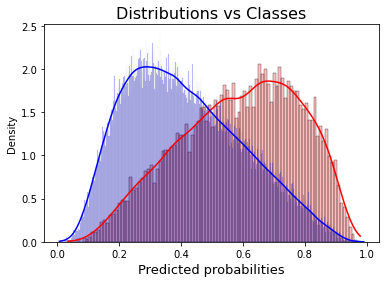

In [58]:
# Distribution of prediction probabilities versus classes
train_predicted_probas = pipe_optim.predict_proba(train)
proba_distributions(train_true,train_predicted_probas,(LOG,run,'Modele/[Optimisation]/Train'))

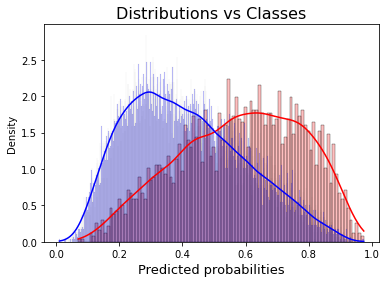

In [59]:
# Distribution of prediction probabilities versus classes
test_predicted_probas = pipe_optim.predict_proba(test)
proba_distributions(test_true,test_predicted_probas,(LOG,run,'Modele/[Optimisation]/Test'))

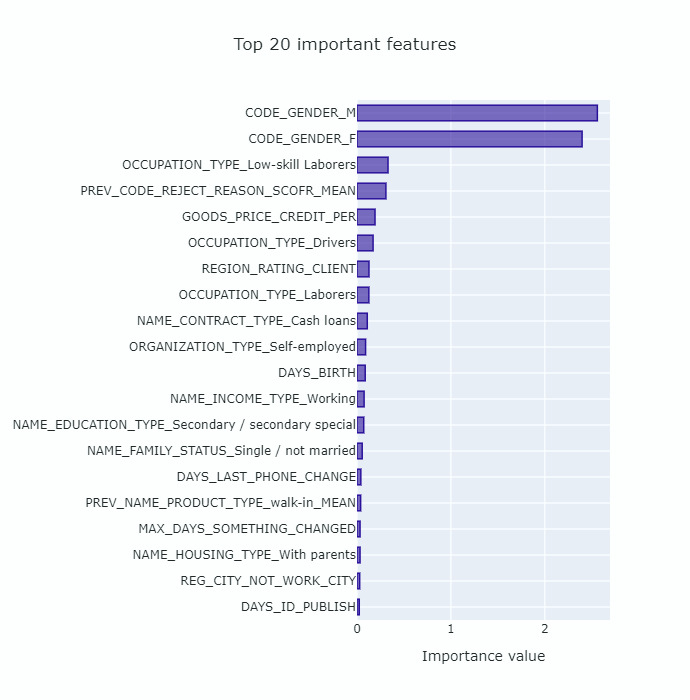

In [60]:
# Feature importance
feature_importance_plot(pipe_optim[-1].coef_[0],train,(LOG,run,'Modele/[Optimisation]/'))

# Récapitulatif des scores

In [61]:
import ast
# List of all experiment logged to Neptune ai
steps =['[Out of bag]','[Under]','[Over]','[Balance]','[Samplers & Weight]','[Optimisation]']
# create lists to retain fetched logs
train_costs, train_aucs, test_costs, names = list(), list(), list(), list()
# ierate throught logs
for step in steps:
    names.append('Logistic Regression '+step)
    train_scores = ast.literal_eval(run['Modele/'+step+'/Train scores'].fetch_last())
    test_score = ast.literal_eval(run['Modele/'+step+'/Test scores'].fetch_last())
    train_costs.append(train_scores['COST'])
    train_aucs.append(train_scores['AUC'])
    test_costs.append(test_score['COST'])

# create results Data Frame
results = pd.DataFrame({'Model name'   : names,
                        'Cost on train': train_costs,
                        'Auc on train' : train_aucs,
                        'Cost on test' : test_costs,
                       }
                      )
joblib.dump(results, 'Results/lr.results')
results.style.highlight_max()

,Model name,Cost on train,Auc on train,Cost on test
0,Logistic Regression [Out of bag],0.503890,0.742715,0.504895
1,Logistic Regression [Under],0.680324,0.742279,0.675100
2,Logistic Regression [Over],0.681392,0.742983,0.676482
3,Logistic Regression [Balance],0.681711,0.742946,0.677065
4,Logistic Regression [Samplers & Weight],0.681730,0.742893,0.675233
5,Logistic Regression [Optimisation],0.682181,0.743257,0.676767


In [62]:
html = results.style.highlight_max().render()

# Sauvegarde du modèle pour dasboard

modèle fitté sur toutes les données disponibles

In [63]:
# Set the filename
save_path = 'Models/'
name= 'logistic_regression_optimized_fitted'
file_name = name+'.mod'

# Fit on whole datas
pipe = clone(pipe_optim)
pipe.fit(features.drop('TARGET', axis=1), features.TARGET)

# Write on disk
joblib.dump(pipe, save_path+file_name, compress=('lzma',3))

if LOG:
    run['Best fitted model on all features jobilb'].upload(File(save_path+file_name))

In [64]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 169 operations to synchronize with Neptune. Do not kill this process.
Still waiting for the remaining 169 operations (0.00% done). Please wait.


All 169 operations synced, thanks for waiting!
